1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [12]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
from scipy import fftpack
from math import sqrt, pi, erf
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Z = 3.4661629670697414


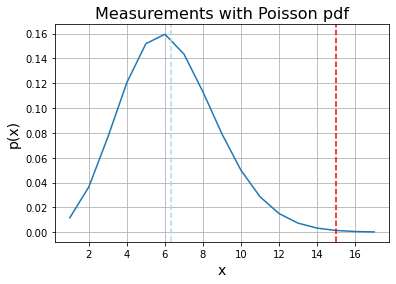

p-value = 0.0005279431738299246
Since the p-value is less than 0.05, the number of hurricanes equal to 15 is signficantly different.


In [6]:
x_bar = 15
mu = 6.3
sigma = math.sqrt(mu)
#determine the z score
Z = abs(x_bar - mu) / sigma
print("Z =", z)

# Plot the Poisson distribution.
w = mu - x_bar
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.9999, mu))
y = stats.poisson.pmf(x, mu)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > x_bar, color='lightblue')
plt.axvline(x_bar, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel('p(x)',size=14)
plt.xlabel('x',size=14)
plt.title('Measurements with Poisson pdf',size=16)
plt.grid(alpha=5)
plt.show()

# Compute the p-value.
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)
print('Since the p-value is less than 0.05, the number of hurricanes equal to 15 is signficantly different.')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [13]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# T test.
n = len(pre)
sigma = sqrt((np.std(pre)**2+np.std(post)**2)/2)
T = (np.mean(pre)-np.mean(post))/(sigma*sqrt(2/(n-1)))
print('T =',T)

# Compute the p-value.
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print('Since the p-value is less than 0.05/2, the change in blood pressures is statistically significant.')

T = -3.786997938137628
p-value = 0.004302464132864607
Since the p-value is less than 0.05/2, the change in blood pressures is statistically significant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Period: 10.5 year


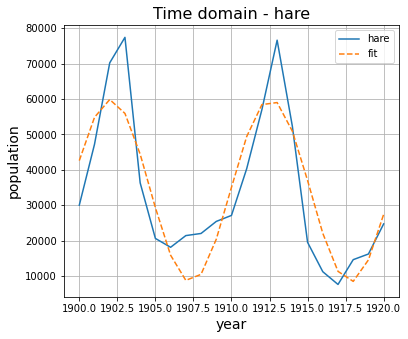

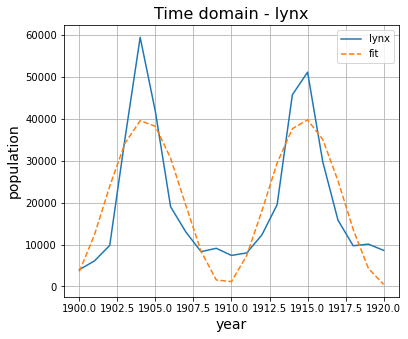

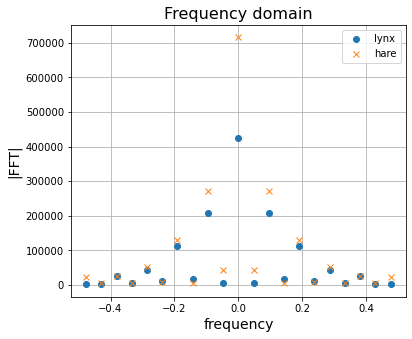

In [16]:
from scipy import fftpack
from scipy.optimize import curve_fit

# Read the data.
data = np.loadtxt('data/populations.txt')

# Extract data into different vectors.
year = data[:,0]
hare = data[:,1]
lynx = data[:,2]

# FFT of the population vectors.
h_fft = fftpack.fft(hare, n=year.size)
l_fft = fftpack.fft(lynx, n=year.size)

# Compute the frequency vector.
freqs = fftpack.fftfreq(year.size, d=year[1]-year[0])

# Compute the period.
period = 1/(freqs[3]-freqs[1])
print('Period:',period,'year')

# Definition of the fitting function.
def f(t, a, b, c):
    return a*np.cos(2*np.pi*(1/period)*t+b)+c

# Find the best parameters for the fit of the data.
popt_hare, _ = curve_fit(f, year, hare, p0=[5000, 5, 5000])
fit_hare = f(year, popt_hare[0], popt_hare[1], popt_hare[2])

popt_lynx, _ = curve_fit(f, year, lynx, p0=[5000, 5, 5000])
fit_lynx = f(year, popt_lynx[0], popt_lynx[1], popt_lynx[2])

# Plot data for the hare population (with the correspondent fit).
fig1 = plt.figure(figsize=(6, 5))
plt.plot(year, hare)
plt.plot(year, fit_hare, linestyle='dashed')
plt.title('Time domain - hare',size=16)
plt.xlabel('year',size=14)
plt.ylabel('population',size=14)
plt.legend(['hare','fit'])
plt.grid(alpha=5)
plt.show()

# Plot data for the lynx population (with the correspondent fit).
fig2 = plt.figure(figsize=(6, 5))
plt.plot(year, lynx)
plt.plot(year, fit_lynx, linestyle='dashed')
plt.title('Time domain - lynx',size=16)
plt.xlabel('year',size=14)
plt.ylabel('population',size=14)
plt.legend(['lynx','fit'])
plt.grid(alpha=5)
plt.show()

# Plot magnitudes for the two FFTs.
fig3 = plt.figure(figsize=(6, 5))
plt.plot(freqs, abs(l_fft), 'o')
plt.plot(freqs, abs(h_fft), 'x')
plt.title('Frequency domain',size=16)
plt.xlabel('frequency',size=14)
plt.ylabel('|FFT|',size=14)
plt.legend(['lynx','hare'])
plt.grid(alpha=5)
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

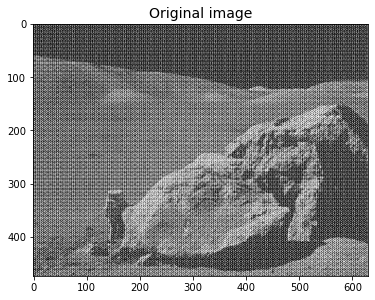

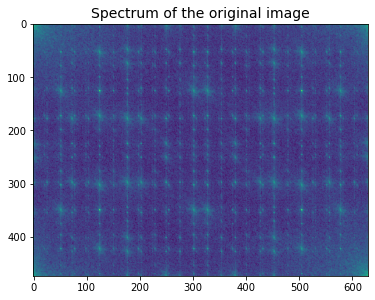

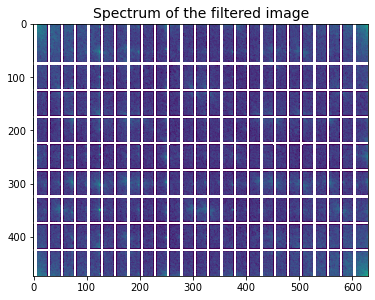

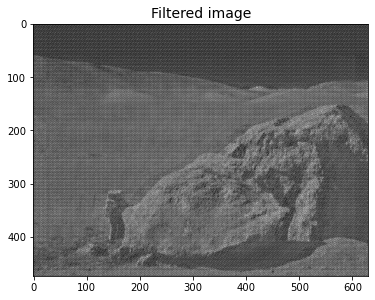

In [17]:
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2

# Read the image.
image = plt.imread("moonlanding.png")

# Show the image.
fig1 = plt.figure(figsize=(6, 6))
plt.imshow(image, plt.cm.gray)
plt.title('Original image',size=14)
plt.show()

# 2-dimensional FFT of the image
X = fft2(image)

# Plot of the spectrum of the image.
fig2 = plt.figure(figsize=(6, 6))
plt.imshow(abs(X), norm=LogNorm(vmin=5))
plt.title('Spectrum of the original image',size=14)
plt.show()

# Build the filter.
filter_len = 8
for i in range(1,filter_len):
    # Zooming the spectrum of the original image we can find the frequencies at which the noise is present.
    # Hence, we can try to remove the noise nulling those frequencies.
    X[:,i:610:25] = 0
    X[70+i:430:50,:] = 0
# Show the spectrum of the filtered image.
fig3 = plt.figure(figsize=(6, 6))
plt.imshow(abs(X), norm=LogNorm(vmin=5))
plt.title('Spectrum of the filtered image',size=14)
plt.show()

# Show the filtered image.
fig4 = plt.figure(figsize=(6, 6))
plt.imshow(abs(ifft2(X)), plt.cm.gray)
plt.title('Filtered image',size=14)
plt.show()